МНК: k = 3.993693502140203, b = 3.222151077447233
np.polyfit: k = 3.9936935021402022, b = 3.2221510774472244
Похибка МНК: k = 0.15766244649492167%, b = 7.405035914907761%
Похибка np.polyfit: k = 0.15766244649494388%, b = 7.40503591490748%


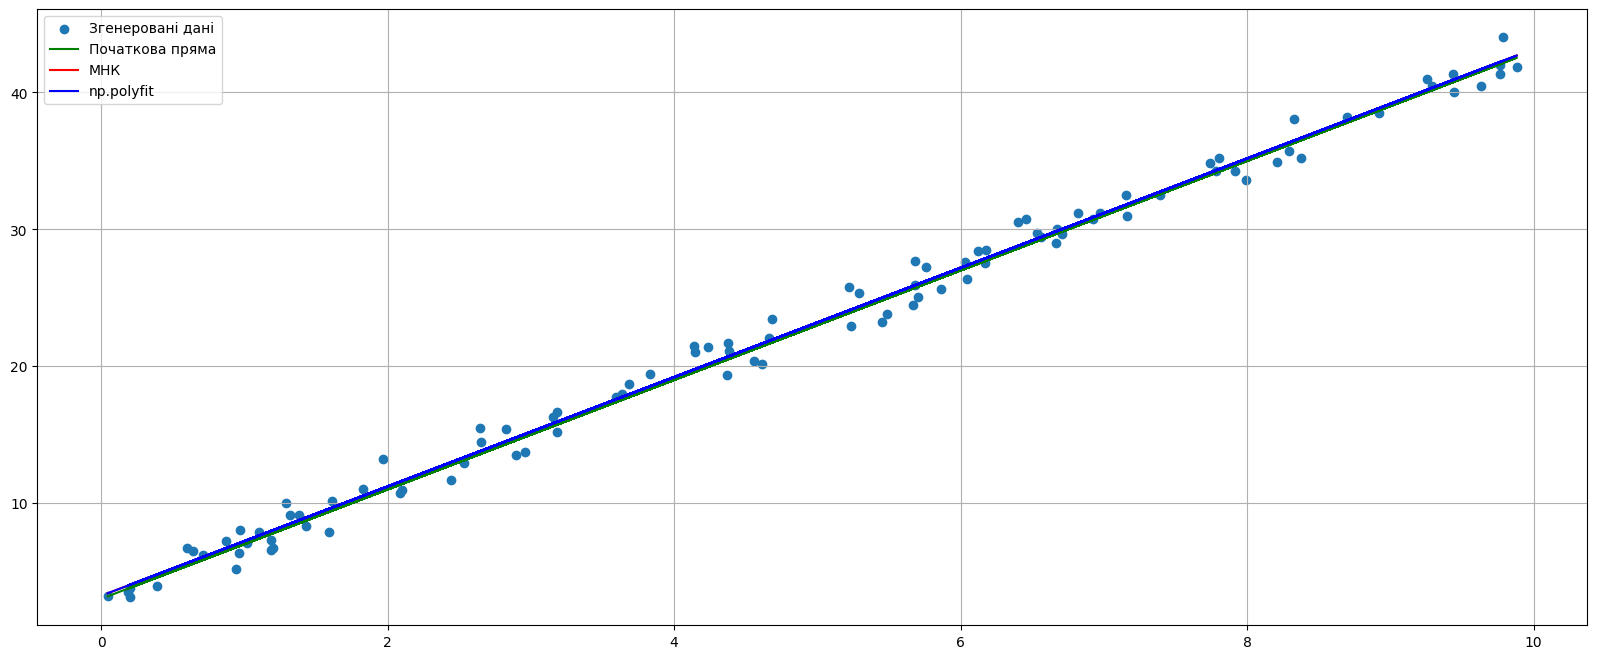

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# генеруємо дані
np.random.seed(0)
x = np.random.rand(100) * 10
y = 4.0 * x + 3.0 + np.random.randn(100)

# функція МНК
def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)

    k = numerator / denominator     # знаходимо нахил
    b = y_mean - k * x_mean         # і зсув

    return k, b

k_ls, b_ls = least_squares(x, y)    # результат МНК
k_pf, b_pf = np.polyfit(x, y, 1)    # результат np.polyfit

# обчислюємо похибки
k_ls_error = np.abs((k_ls - 4) / 4) * 100
b_ls_error = np.abs((b_ls - 3) / 3) * 100
k_pf_error = np.abs((k_pf - 4) / 4) * 100
b_pf_error = np.abs((b_pf - 3) / 3) * 100

print(f'МНК: k = {k_ls}, b = {b_ls}')
print(f'np.polyfit: k = {k_pf}, b = {b_pf}')
print(f'Похибка МНК: k = {k_ls_error}%, b = {b_ls_error}%')
print(f'Похибка np.polyfit: k = {k_pf_error}%, b = {b_pf_error}%')

plt.figure(figsize=(20, 8))
plt.scatter(x, y, label='Згенеровані дані')
plt.plot(x, 4.0 * x + 3.0, color='green', label='Початкова пряма')
plt.plot(x, k_ls * x + b_ls, color='red', label='МНК')
plt.plot(x, k_pf * x + b_pf, color='blue', label='np.polyfit')

plt.legend()
plt.grid(True)
plt.show()

Градієнтний спуск: k = 3.995649087567517, b = 3.2095767306669476
Похибка для градієнтного спуску: k = 0.10877281081207446%, b = 6.985891022231587%


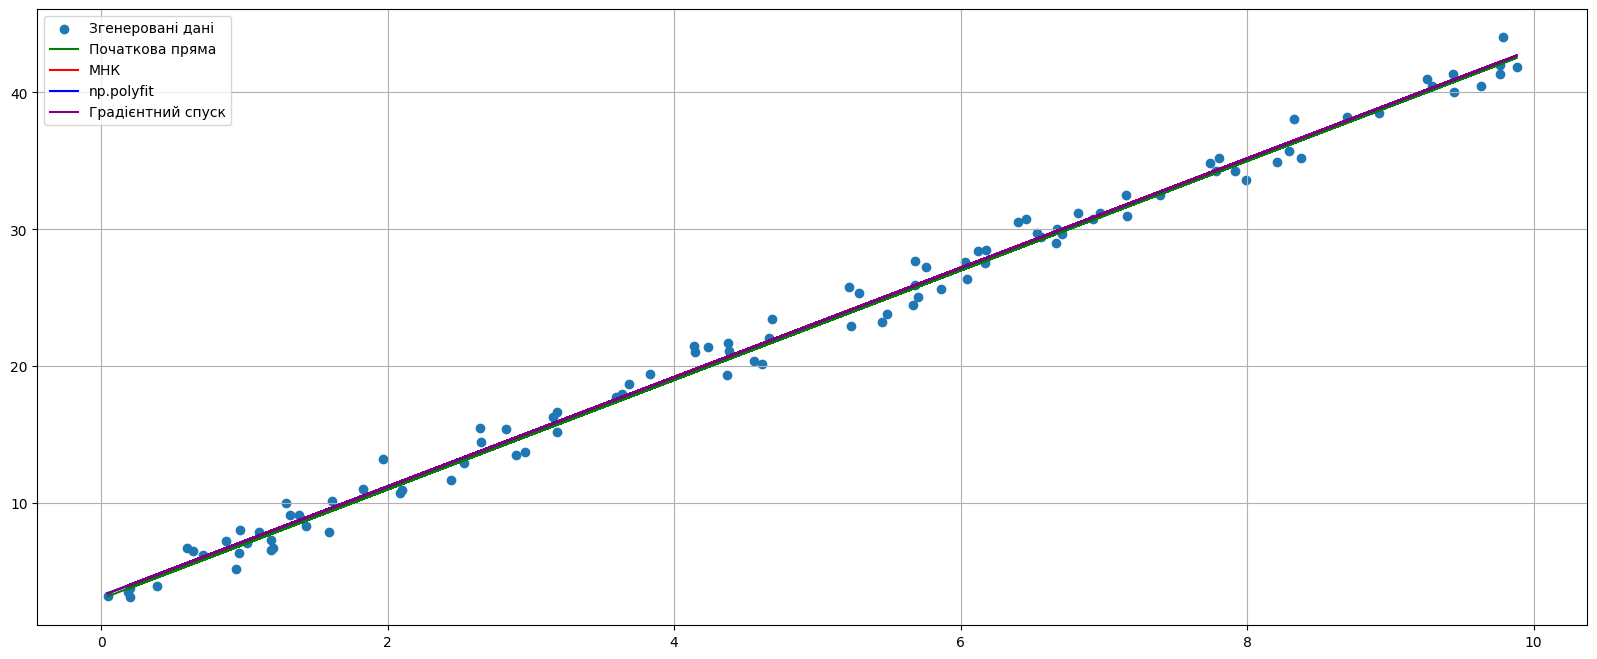

In [2]:
# функція градієнтного спуску
def gradient_descent(x, y, learning_rate, n_iter):
    n = len(x)
    k = 0.0
    b = 0.0
    errors = []

    for i in range(n_iter):
        y_pred = k * x + b # обчислюємо поточні прогнози
        error = (1 / n) * np.sum((y - y_pred) ** 2) # середньоквадратична помилка
        errors.append(error)

        # обчислюємо часткові похідні
        dk = -(2 / n) * np.sum(x * (y - y_pred))
        db = -(2 / n) * np.sum(y - y_pred)

        # оновлюємо параметри
        k = k - learning_rate * dk
        b = b - learning_rate * db

    return k, b, errors

# задаємо параметри навчання
learning_rate = 0.01
n_iter = 1000

k_gd, b_gd, errors = gradient_descent(x, y, learning_rate, n_iter)
print(f'Градієнтний спуск: k = {k_gd}, b = {b_gd}')

# обчислюємо похибки
k_gd_error = np.abs((k_gd - 4) / 4) * 100
b_gd_error = np.abs((b_gd - 3) / 3) * 100
print(f'Похибка для градієнтного спуску: k = {k_gd_error}%, b = {b_gd_error}%')

plt.figure(figsize=(20, 8))
plt.scatter(x, y, label='Згенеровані дані')
plt.plot(x, 4.0 * x + 3.0, color='green', label='Початкова пряма')
plt.plot(x, k_ls * x + b_ls, color='red', label='МНК')
plt.plot(x, k_pf * x + b_pf, color='blue', label='np.polyfit')
plt.plot(x, k_gd * x + b_gd, color='purple', label='Градієнтний спуск')

plt.legend()
plt.grid(True)
plt.show()

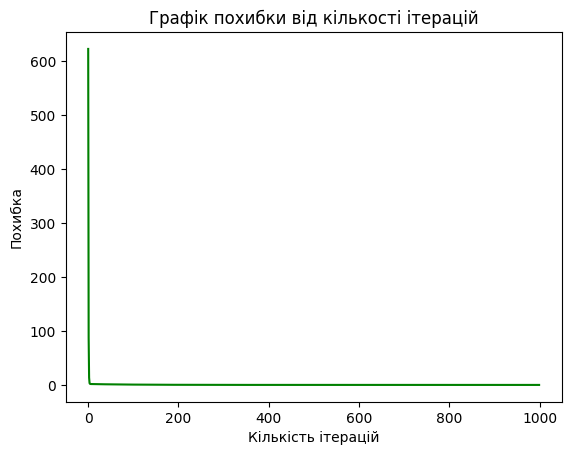

In [3]:
plt.plot(range(n_iter), errors, color='green')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Графік похибки від кількості ітерацій')
plt.show()